# TP -  Résolution d'EDO

On a l'EDO suivante sur $\sigma$ : 
$$
\dot \sigma 
+
\frac{E}{\eta}
\sigma
=
\dot \varepsilon E
$$
avec $\dot \varepsilon = cst$ et $\sigma(t=0)=0$. 

## Solution analytique

La solution s'écrit sous la forme d'une solution homogène (second membre nul) $\sigma^h$ plus une solution particulière $\sigma^p$ :
$$
\sigma = 
\sigma^h
+
\sigma^p
$$
L'équation homogène associée est :
$$
\dot \sigma 
+
\frac{E}{\eta}
\sigma
=
0
$$
La solution homogène est de la forme :
$$
\sigma^h(t) = Ke^{-\frac{E t}{\eta}}
$$
avec $K$ une constante.

Pour trouver une solution particulière $\sigma^p$, on cherche une constante (indépendente du temps) pour laquelle on a : 
$$
\sigma^p = cst,
$$
$$
\dot \sigma^p = 0.
$$
En replaçant dans l'équation initiale, on a :
$$
\sigma^p = \dot \varepsilon \eta
$$
Finalement, on a :
$$
\sigma (t) = 
Ke^{-\frac{E t}{\eta}}
+ 
\dot \varepsilon \eta
$$
puis en faisant intervenir la condition initiale, on peut déduire $K$ et aboutir à :
$$
\sigma (t) = 
\dot\varepsilon \eta
(1 - e^{-\frac{E t}{\eta}}).
$$

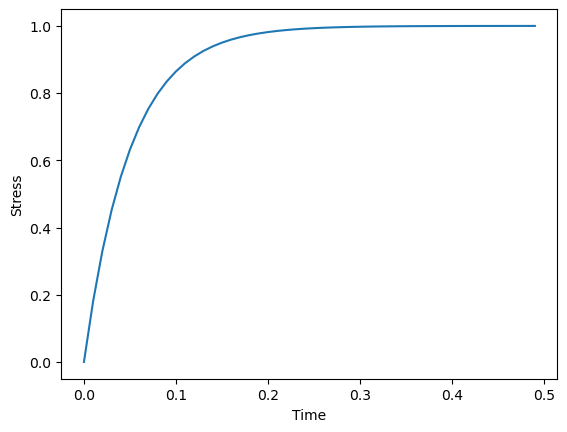

In [2]:
import numpy as np
import matplotlib.pyplot as plt

tf = 0.5
eta = 1000.
E = 20000.
dot_eps = 1.0e-3
Delta_t = 0.01

sigma_ana = lambda t : dot_eps*eta*(1. - np.exp(-E*t/eta))
time = np.arange(0, tf, Delta_t)

plt.plot(time, sigma_ana(time))

plt.xlabel("Time")
plt.ylabel("Stress")

plt.show()

## Euler explicite

On met le problème sous la forme d'une problème de Cauchy : 
$$
\dot \sigma 
=
-
\frac{E}{\eta}
\sigma
+
\dot \varepsilon E
$$
avec $\sigma(t=0) = 0$. On reprenant la forme proposée pour le problème de Cauchy : 
$$
y' = f(y(t), t),
$$
on a ici : 
$$
y =  \sigma,
$$
$$
y' = \dot \sigma,
$$
$$
f(y(t), t) = 
-
\frac{E}{\eta}
y(t)
+
\dot \varepsilon E,
$$
ou de façon équivalente : 
$$
f(\sigma(t)) = 
-
\frac{E}{\eta}
\sigma(t)+
\dot \varepsilon E,$$
Le schéma d'Euler explicite s'écrit alors : 
$$
\sigma_{i+1} = 
\sigma_i
    + \Delta t f(\sigma_i)
$$

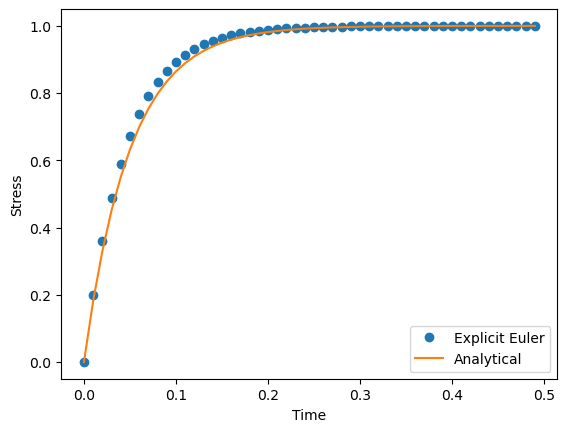

In [3]:
f = lambda y : -E/eta*y + dot_eps*E

sig_0 = 0 

sigma_list = list()
sigma_list.append(sig_0)

def euler_explicit(sigma_list, time):
    for i in time: 
        sigma_n = sigma_list[-1]
        sigma_np1 = sigma_n + Delta_t*f(sigma_n)
        sigma_list.append(sigma_np1)
    
    return sigma_list

sigma_list = euler_explicit(sigma_list, time)

plt.plot(time, sigma_list[:-1], "o", label="Explicit Euler")
plt.plot(time, sigma_ana(time), ms=1.5, label="Analytical")

plt.xlabel("Time")
plt.ylabel("Stress")

plt.legend()

## Euler implicite

Le schéma d'Euler implicite s'écrit : 
$$
\sigma_{i+1} = 
\sigma_i
    + \Delta t f(\sigma_{i+1}).
$$
Le problème étant suffisamment simple, on peut inverser la relation analytiquement et isoler $\sigma_{i+1}$ :
$$
\sigma_{i+1} = 
\sigma_i
    + \Delta t
\left(
    - \frac{E}{\eta} \sigma_{i+1}
+ \dot \varepsilon E,
\right)
$$
soit : 
$$
\sigma_{i+1} = 
\frac{\sigma_i + \Delta t \dot\varepsilon E}{1 + \Delta t \frac{E}{\eta}}.
$$

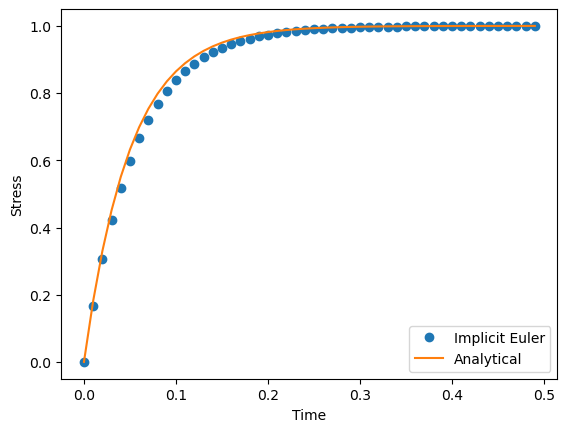

In [4]:
sig_0 = 0 

sigma_list = list()
sigma_list.append(sig_0)

def euler_implicit(sigma_list, time):

    for i in time: 
        sigma_n = sigma_list[-1]
        sigma_np1 = (sigma_n + Delta_t*dot_eps*E)/(1. + Delta_t*E/eta)
        sigma_list.append(sigma_np1)
    
    return sigma_list

sigma_list = euler_implicit(sigma_list, time)

plt.plot(time, sigma_list[:-1], "o", label="Implicit Euler")
plt.plot(time, sigma_ana(time), ms=1.5, label="Analytical")

plt.xlabel("Time")
plt.ylabel("Stress")

plt.legend()

## RK4

On implémente maintenant le méthode de Runge-Kutta d'ordre 4. L'implémentation suit exactement ce qui a été présenté dans le cours. On remarque rien qu'à l'oeil nu une meileure correspondance avec la solution analytique. Poussons cette analyse.

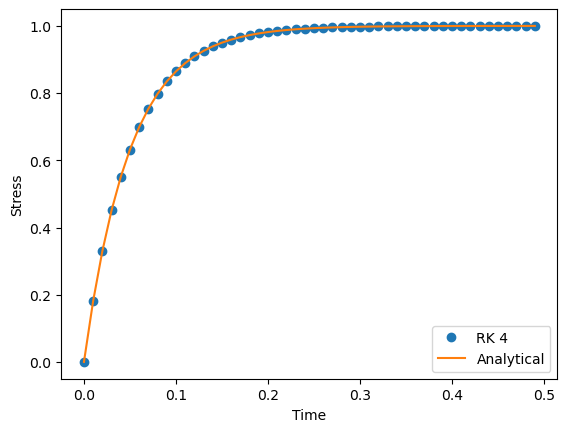

In [5]:
sig_0 = 0 

sigma_list = list()
sigma_list.append(sig_0)

def rk4(sigma_list, time):

    for i in time: 
        sigma_n = sigma_list[-1]

        k1 = Delta_t*f(sigma_n)
        k2 = Delta_t*f(sigma_n + k1/2.)
        k3 = Delta_t*f(sigma_n + k2/2.)
        k4 = Delta_t*f(sigma_n + k3)

        sigma_np1 = sigma_n + (k1 + 2.*k2 + 2.*k3 + k4)/6.
        sigma_list.append(sigma_np1)
    
    return sigma_list

sigma_list = rk4(sigma_list, time)
        
plt.plot(time, sigma_list[:-1], "o", label="RK 4")
plt.plot(time, sigma_ana(time), ms=1.9, label="Analytical")

plt.xlabel("Time")
plt.ylabel("Stress")

plt.legend()

## Courbes de convergence

On peut enfin tracer l'erreur par rapport à la solution de référence en fonction du pas du temps. On montre ainsi numériquement que les méthodes convergent bien vers la solution. Dans le vocabulaire éléments finis, on parle souvent de **courbes de convergence**. Ces courbes permettent aussi de comparer les différents méthodes et d'identifier celles qui, pour une discrétisation donnée, aboutissent aux resultats les plus précis. En échelle logarithmique, on obtient une droite donne la pente donne l'**ordre** de la méthode. On retrouve bien un ordre 1 pour les schéma d'Euler et un ordre 4 pour le RK4. On constate aussi que pour une discrétisation l'erreur du schéma d'Euler implicite explose. Ceci s'explique par le fait que le pas de temps ne satisfait pas la condition de stabilité du schéma.

Enfin, on peut comparer les résultats de nos implémentations avec ceux d'une bibliothèque. Scipy propose une fonction `scipy.integrate.odeint` qui permet d'intégrer des EDO simplement. On constate sur la courbe de convergence que l'erreur est constante est située autour de $10^{-9}$. Attention : ça ne veut pas dire que le schéma utilisé est d'ordre 0! Quand on fouille un peu la documentation, on constate que la méthode s'arrange pour avoir une erreur autour de $10^{-9}$ par défaut. Bref, pensez à bien à regarder la documentation, surtout quand un comportement vous semblez étrange et utilisez votre sens physique pour le justifier ou non!

/tmp/ipykernel_90168/2476511931.py:30: RuntimeWarning: invalid value encountered in true_divide
  err_rk4 = np.abs(sigma_rk4_list - ana)/ana
/tmp/ipykernel_90168/2476511931.py:34: RuntimeWarning: invalid value encountered in true_divide
  err_Ee = np.abs(sigma_Ee_list - ana)/ana
/tmp/ipykernel_90168/2476511931.py:38: RuntimeWarning: invalid value encountered in true_divide
  err_Ei = np.abs(sigma_Ei_list - ana)/ana
/tmp/ipykernel_90168/2476511931.py:44: RuntimeWarning: invalid value encountered in true_divide
  err_scipy = np.abs(sigma_scipy - ana)/ana


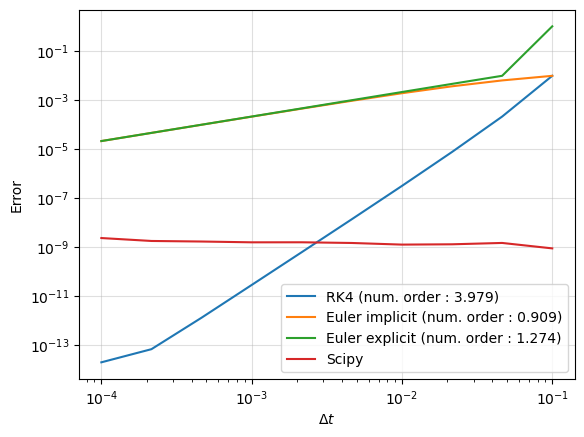

In [28]:
import numpy as np
import scipy.integrate as scint
import scipy.stats as scst

dy_dt =lambda y, t :  -E/eta*y + dot_eps*E
sigma_ana = lambda t : dot_eps*eta*(1. - np.exp(-E*t/eta))

tf = 4.
Delta_t_list = np.geomspace(0.1, 0.0001, 10)

err_rk4_list = list()
err_Ee_list = list()
err_Ei_list = list()
err_scipy_list = list()

for Delta_t in Delta_t_list:

    time = np.arange(0, tf, Delta_t)
        
    sigma_rk4_list = rk4([0.], time)    
    sigma_Ee_list = euler_explicit([0.], time)
    sigma_Ei_list = euler_implicit([0.], time)
    
    sigma_rk4_list = np.array(sigma_rk4_list[:-1])
    sigma_Ee_list = np.array(sigma_Ee_list[:-1])
    sigma_Ei_list = np.array(sigma_Ei_list[:-1])
    
    ana = np.array(sigma_ana(time))

    err_rk4 = np.abs(sigma_rk4_list - ana)/ana
    err_rk4 = np.nan_to_num(err_rk4)
    err_rk4_list.append(err_rk4.mean())
    
    err_Ee = np.abs(sigma_Ee_list - ana)/ana
    err_Ee = np.nan_to_num(err_Ee)
    err_Ee_list.append(err_Ee.mean())
    
    err_Ei = np.abs(sigma_Ei_list - ana)/ana
    err_Ei = np.nan_to_num(err_Ei)
    err_Ei_list.append(err_Ei.mean())
    
    sigma_scipy = scint.odeint(dy_dt, y0=0., t=time).ravel()
    sigma_scipy = np.array(sigma_scipy)
    err_scipy = np.abs(sigma_scipy - ana)/ana
    err_scipy = np.nan_to_num(err_scipy)
    err_scipy_list.append(err_scipy.mean())    

slope_rk4 = scst.linregress(np.log(Delta_t_list), np.log(err_rk4_list)).slope
slope_Ee = scst.linregress(np.log(Delta_t_list), np.log(err_Ee_list)).slope
slope_Ei = scst.linregress(np.log(Delta_t_list), np.log(err_Ei_list)).slope

plt.loglog(Delta_t_list, err_rk4_list, label="RK4 (num. order : "+str(round(slope_rk4,3))+")")
plt.loglog(Delta_t_list, err_Ei_list, label="Euler implicit (num. order : "+str(round(slope_Ei,3))+")")
plt.loglog(Delta_t_list, err_Ee_list, label="Euler explicit (num. order : "+str(round(slope_Ee,3))+")")
plt.loglog(Delta_t_list, err_scipy_list, label="Scipy")

plt.xlabel("$\Delta t$")
plt.ylabel("Error")
plt.grid(alpha=0.4)
plt.legend()